In [1]:
import pandas as pd
import numpy as np

## Relax Challenge Details

### The  data  is  available  as  two  attached  CSV  files:
* takehome_user_engagement. csv
* takehome_users . csv

### The  data  has  the  following  two  tables:
1.  A  user  table  ( "takehome_users" )  with  data  on  12,000  users  who  signed  up  for  the product  in  the  last  two  years.   This  table  includes:
* name:  the  user's  name
* object_id:   the  user's  id
* email:  email  address
* creation_source:   how  their  account  was  created.  This  takes  on  one of  5  values:
* PERSONAL_PROJECTS:  invited  to  join  another  user's personal  workspace
* GUEST_INVITE:  invited  to  an  organization  as  a  guest (limited  permissions)
* ORG_INVITE:  invited  to  an  organization  (as  a  full  member)
* SIGNUP:  signed  up  via  the  website
* SIGNUP_GOOGLE_AUTH:  signed  up  using  Google Authentication  (using  a  Google  email  account  for  their  login id)
* creation_time:  when  they  created  their  account
* last_session_creation_time:   unix  timestamp  of  last  login
* opted_in_to_mailing_list:  whether  they  have  opted  into  receiving marketing  emails
* enabled_for_marketing_drip:  whether  they  are  on  the  regular marketing  email  drip
* org_id:   the  organization  (group  of  users)  they  belong  to
* invited_by_user_id:   which  user  invited  them  to  join  (if  applicable).
2.  A  usage  summary  table  ( "takehome_user_engagement" )  that  has  a  row  for  each  day that  a  user  logged  into  the  product. 

##### Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate days  in  at  least  one  seven-day  period, identify  which  factors  predict  future  user adoption 


In [2]:
# Let's take a look at the data sets
user_engagement = pd.read_csv('takehome_user_engagement.csv')

In [3]:
user_engagement.head(20)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [4]:
# Let's take a look at the info

user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
# It's an object type (text), let's convert to timestamp

user_engagement['time_stamp'] = pd.to_datetime(user_engagement['time_stamp'])

In [6]:
user_engagement['time_stamp'].head()

0   2014-04-22 03:53:30
1   2013-11-15 03:45:04
2   2013-11-29 03:45:04
3   2013-12-09 03:45:04
4   2013-12-25 03:45:04
Name: time_stamp, dtype: datetime64[ns]

In [7]:
# Sort values in order

user_engagement = user_engagement.sort_values(['time_stamp'])

In [8]:
user_engagement['time_stamp'].head()

178140   2012-05-31 08:20:06
59486    2012-05-31 15:47:36
175638   2012-05-31 17:19:37
26821    2012-05-31 21:58:33
109716   2012-06-01 00:17:30
Name: time_stamp, dtype: datetime64[ns]

In [9]:
user_engagement = user_engagement.set_index('time_stamp')

In [10]:
# Set the time stamp as the index
user_engagement.head()

,user_id,visited
time_stamp,,
2012-05-31 08:20:06,10012,1
2012-05-31 15:47:36,3428,1
2012-05-31 17:19:37,9899,1
2012-05-31 21:58:33,1693,1
2012-06-01 00:17:30,6102,1


In [11]:
# Group by user id, aggregating at a frequency of every 7 days

engagement_7 = user_engagement.groupby(['user_id', pd.Grouper(freq='W')])['visited'].sum()

In [12]:
engagement_7.head(20)

user_id  time_stamp
1        2014-04-27    1
2        2013-11-17    1
         2013-12-01    1
         2013-12-15    1
         2013-12-29    1
         2014-01-05    1
         2014-01-12    1
         2014-02-09    3
         2014-02-16    2
         2014-03-09    1
         2014-03-16    1
         2014-04-06    1
3        2013-03-24    1
4        2013-05-26    1
5        2013-01-27    1
6        2013-12-22    1
7        2012-12-23    1
10       2013-01-20    1
         2013-01-27    1
         2013-02-03    1
Name: visited, dtype: int64

In [13]:
# Unstack so 7 day dates becomes the columns. Visualize

engagement_7 = engagement_7.unstack()
engagement_7.head(10)

time_stamp,2012-06-03,2012-06-10,2012-06-17,2012-06-24,2012-07-01,2012-07-08,2012-07-15,2012-07-22,2012-07-29,2012-08-05,...,2014-04-06,2014-04-13,2014-04-20,2014-04-27,2014-05-04,2014-05-11,2014-05-18,2014-05-25,2014-06-01,2014-06-08
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,5.0,7.0,4.0,5.0,7.0,7.0,7.0,7.0,2.0
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Create a column name for each of the 7 day blocks

columns = list(engagement_7.columns)
columns[:5]

[Timestamp('2012-06-03 00:00:00', freq='W-SUN'),
 Timestamp('2012-06-10 00:00:00', freq='W-SUN'),
 Timestamp('2012-06-17 00:00:00', freq='W-SUN'),
 Timestamp('2012-06-24 00:00:00', freq='W-SUN'),
 Timestamp('2012-07-01 00:00:00', freq='W-SUN')]

In [15]:
# Get the max for each row (max number of days among all 7 day periods for that user)


engagement_7['max_visits_7_days'] = engagement_7[columns].max(axis=1)
engagement_7['max_visits_7_days'].head()

user_id
1    1.0
2    3.0
3    1.0
4    1.0
5    1.0
Name: max_visits_7_days, dtype: float64

In [16]:
# Get back the id column for merging later

engagement_max_visits = engagement_7[['max_visits_7_days']].reset_index()

In [17]:
# If the max number of days compared across all columns is 3 or more, there is at least
# One block with 3 or more days - this is the requirement for adopted

engagement_max_visits['adopted'] = engagement_max_visits['max_visits_7_days']>=3
engagement_max_visits['adopted'].head()

0    False
1     True
2    False
3    False
4    False
Name: adopted, dtype: bool

In [18]:
# Convert to 0 or 1

engagement_max_visits['adopted'] = engagement_max_visits['adopted'].astype(int)
engagement_max_visits['adopted'].head()

0    0
1    1
2    0
3    0
4    0
Name: adopted, dtype: int32

In [19]:
max_visits = engagement_max_visits[['user_id','adopted']]
max_visits.head()

time_stamp,user_id,adopted
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [20]:
# Take a look at the users column

users = pd.read_csv('takehome_users.csv')

In [21]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [22]:
# Check data types, length, nulls
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [23]:
# Need to know last session creation time
users = users[~users['last_session_creation_time'].isnull()]
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [24]:
# Number of unique users matches our final aggregation of the other dataframe
user_engagement['user_id'].nunique()

8823

In [25]:
#Rename column to merge "user_id"

users.rename(columns={"object_id": "user_id"}, inplace=True)

In [26]:
data = max_visits.merge(users, how='inner', on='user_id')

In [27]:
data.head()

,user_id,adopted,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [28]:
len(data)

8823

In [29]:
# creation time is an object type (text), let's convert to timestamp

data['creation_time'] = pd.to_datetime(data['creation_time'])
data['creation_time'].head()

0   2014-04-22 03:53:30
1   2013-11-15 03:45:04
2   2013-03-19 23:14:52
3   2013-05-21 08:09:28
4   2013-01-17 10:14:20
Name: creation_time, dtype: datetime64[ns]

In [30]:
# Last session creation time is in unix time, convert to datetime

data['last_session_creation_time'] = pd.to_datetime(data['last_session_creation_time'],unit='s')
data['last_session_creation_time'].head()

0   2014-04-22 03:53:30
1   2014-03-31 03:45:04
2   2013-03-19 23:14:52
3   2013-05-22 08:09:28
4   2013-01-22 10:14:20
Name: last_session_creation_time, dtype: datetime64[ns]

In [31]:
data['last_session_creation_time'].isnull().sum()

0

In [32]:
data['last_month'] = data['last_session_creation_time'].dt.month

In [33]:
data['last_year'] = data['last_session_creation_time'].dt.year

In [34]:
data['first_month'] = data['creation_time'].dt.month

In [35]:
data['first_year'] = data['creation_time'].dt.year

In [36]:
data['adopted'].value_counts()

0    7378
1    1445
Name: adopted, dtype: int64

In [37]:
data.columns

Index(['user_id', 'adopted', 'creation_time', 'name', 'email',
       'creation_source', 'last_session_creation_time',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'last_month', 'last_year', 'first_month',
       'first_year'],
      dtype='object')

In [38]:
#The difference between the two dates "active days"

data['active_days'] = data['last_session_creation_time'] - data['creation_time']
data['active_days'] = data['active_days'].dt.days
data['active_days'].head()

0      0
1    136
2      0
3      1
4      5
Name: active_days, dtype: int64

In [39]:
# Too many emails - these would all be categorical creating huge sparse matrices
# Get top value counts, else not top 10

data['provider'] = [x.split('@')[1] for x in data['email']]
providers = data['provider'].value_counts().index[:10]
data['provider'] = [x if x in providers else 'not top 10' for x in data['provider']]
data['provider'].head()

0    yahoo.com
1    gustr.com
2    gustr.com
3    yahoo.com
4    yahoo.com
Name: provider, dtype: object

In [40]:
data['invited_by_user_id'].head()

0    10803.0
1      316.0
2     1525.0
3     5151.0
4     5240.0
Name: invited_by_user_id, dtype: float64

In [41]:
data['invited_by_user_id'].value_counts()[:10]

4612.0     10
11770.0     9
2308.0      9
10628.0     8
6808.0      8
           ..
3593.0      1
11144.0     1
6868.0      1
9325.0      1
10.0        1
Name: invited_by_user_id, Length: 2228, dtype: int64

In [42]:
# I suppose if not invited by user ID, that will be 0 to replace null values
data['invited_by_user_id'] = data['invited_by_user_id'].fillna(0)

# We will use the mean of adopted users which will simply represent the sum of adopted users ignoring users that were not adopted. This will be a clean representation of the proportion of adopted users as the client wants them represented

In [43]:
# Can use the mean of this column as it will represent the proportion of adopted users

data['adopted'].mean() == 1445./(7378 + 1445)

True

In [44]:
data.columns

Index(['user_id', 'adopted', 'creation_time', 'name', 'email',
       'creation_source', 'last_session_creation_time',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'last_month', 'last_year', 'first_month',
       'first_year', 'active_days', 'provider'],
      dtype='object')

In [45]:
# Let's separate by year, by month

data['last_year'].value_counts()

2014    3732
2013    3508
2012    1583
Name: last_year, dtype: int64

In [46]:
indexed = data.sort_values('creation_time')
indexed.head()

,user_id,adopted,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_month,last_year,first_month,first_year,active_days,provider
2843,3861,0,2012-05-31 00:43:27,Jensen Stine,StineAJensen@yahoo.com,ORG_INVITE,2012-06-03 00:43:27,0,0,115,3861.0,6,2012,5,2012,3,yahoo.com
8399,11430,0,2012-05-31 01:42:31,Wood Levi,LeviWood@hotmail.com,ORG_INVITE,2012-06-01 01:42:31,0,0,239,5677.0,6,2012,5,2012,1,hotmail.com
5244,7170,0,2012-05-31 06:23:51,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,2012-08-20 06:23:51,0,0,145,7170.0,8,2012,5,2012,81,hotmail.com
7357,10012,0,2012-05-31 08:20:06,Spikes Danille,DanilleJSpikes@hotmail.com,ORG_INVITE,2012-05-31 08:20:06,0,1,225,7104.0,5,2012,5,2012,0,hotmail.com
8821,11999,0,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,0.0,6,2012,5,2012,2,not top 10


In [47]:
indexed = indexed.set_index('creation_time')
indexed.head()

,user_id,adopted,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_month,last_year,first_month,first_year,active_days,provider
creation_time,,,,,,,,,,,,,,,,
2012-05-31 00:43:27,3861,0,Jensen Stine,StineAJensen@yahoo.com,ORG_INVITE,2012-06-03 00:43:27,0,0,115,3861.0,6,2012,5,2012,3,yahoo.com
2012-05-31 01:42:31,11430,0,Wood Levi,LeviWood@hotmail.com,ORG_INVITE,2012-06-01 01:42:31,0,0,239,5677.0,6,2012,5,2012,1,hotmail.com
2012-05-31 06:23:51,7170,0,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,2012-08-20 06:23:51,0,0,145,7170.0,8,2012,5,2012,81,hotmail.com
2012-05-31 08:20:06,10012,0,Spikes Danille,DanilleJSpikes@hotmail.com,ORG_INVITE,2012-05-31 08:20:06,0,1,225,7104.0,5,2012,5,2012,0,hotmail.com
2012-05-31 11:55:59,11999,0,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,0.0,6,2012,5,2012,2,not top 10


In [48]:
start_2012 = indexed.loc['2012']

In [49]:
start_2013 = indexed.loc['2013']

In [50]:
start_2014 = indexed.loc['2014']

# Find highest number of adopted users by account creation time

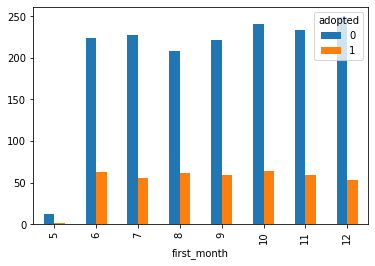

In [51]:
start_2012[['first_month','adopted']].value_counts()\
.unstack().\
plot(kind='bar');

In [52]:
print('2012 Highest adopted vs non adopted start months: \n\n',start_2012[['first_month','adopted']].\
      value_counts().unstack().idxmax())
print('\nvalues: \n\n',start_2012[['first_month','adopted']].value_counts().unstack().max())

2012 Highest adopted vs non adopted start months: 

 adopted
0    12
1    10
dtype: int64

values: 

 adopted
0    249
1     64
dtype: int64


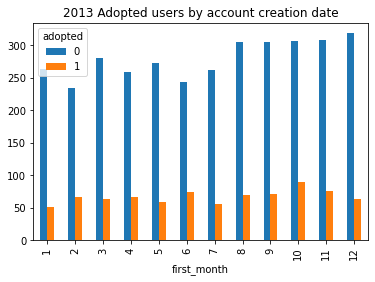

In [53]:
start_2013[['first_month','adopted']].value_counts().unstack().plot(kind='bar',title='2013 Adopted users by account creation date');

In [54]:
print('2013 Highest adopted vs non adopted start months: \n\n',start_2013[['first_month','adopted']].\
      value_counts().unstack().idxmax())
print('\nvalues: \n\n',start_2013[['first_month','adopted']].value_counts().unstack().max())

2013 Highest adopted vs non adopted start months: 

 adopted
0    12
1    10
dtype: int64

values: 

 adopted
0    319
1     90
dtype: int64


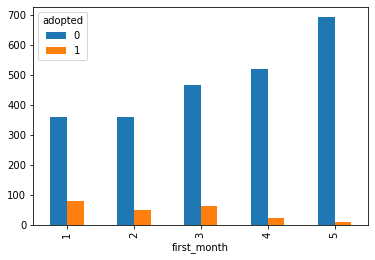

In [55]:
start_2014[['first_month','adopted']].value_counts().unstack().plot(kind='bar');

# We need to find out what's driving adoption on those account creation dates, as we can see in 2014, our last available year, adoption as defined by the client is decreasing when varying with creation date month by month

In [56]:
print('2014 Highest adopted vs non adopted months: \n\n',start_2014[['first_month','adopted']].\
      value_counts().unstack().idxmax())
print('\nvalues: \n\n',start_2014[['first_month','adopted']].value_counts().unstack().max())

2014 Highest adopted vs non adopted months: 

 adopted
0    5
1    1
dtype: int64

values: 

 adopted
0    693
1     80
dtype: int64


# Oct 2013 has the highest number of adopted users by account creation time

In [57]:
indexed_last = data.sort_values('last_session_creation_time')
indexed.head()

,user_id,adopted,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_month,last_year,first_month,first_year,active_days,provider
creation_time,,,,,,,,,,,,,,,,
2012-05-31 00:43:27,3861,0,Jensen Stine,StineAJensen@yahoo.com,ORG_INVITE,2012-06-03 00:43:27,0,0,115,3861.0,6,2012,5,2012,3,yahoo.com
2012-05-31 01:42:31,11430,0,Wood Levi,LeviWood@hotmail.com,ORG_INVITE,2012-06-01 01:42:31,0,0,239,5677.0,6,2012,5,2012,1,hotmail.com
2012-05-31 06:23:51,7170,0,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,2012-08-20 06:23:51,0,0,145,7170.0,8,2012,5,2012,81,hotmail.com
2012-05-31 08:20:06,10012,0,Spikes Danille,DanilleJSpikes@hotmail.com,ORG_INVITE,2012-05-31 08:20:06,0,1,225,7104.0,5,2012,5,2012,0,hotmail.com
2012-05-31 11:55:59,11999,0,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,0.0,6,2012,5,2012,2,not top 10


# Find Highest number of adopted user account termination

In [58]:
indexed_last = indexed_last.set_index('last_session_creation_time')
indexed_last.head()

,user_id,adopted,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_month,last_year,first_month,first_year,active_days,provider
last_session_creation_time,,,,,,,,,,,,,,,,
2012-05-31 08:20:06,10012,0,2012-05-31 08:20:06,Spikes Danille,DanilleJSpikes@hotmail.com,ORG_INVITE,0,1,225,7104.0,5,2012,5,2012,0,hotmail.com
2012-05-31 17:19:37,9899,0,2012-05-31 17:19:37,J�rgensen Sofie,SofieNJrgensen@yahoo.com,ORG_INVITE,0,0,138,9899.0,5,2012,5,2012,0,yahoo.com
2012-06-01 01:42:31,11430,0,2012-05-31 01:42:31,Wood Levi,LeviWood@hotmail.com,ORG_INVITE,0,0,239,5677.0,6,2012,5,2012,1,hotmail.com
2012-06-01 13:14:18,1995,0,2012-05-31 13:14:18,Cardoso Rafaela,RafaelaAzevedoCardoso@hotmail.com,ORG_INVITE,1,0,363,1995.0,6,2012,5,2012,1,hotmail.com
2012-06-01 14:30:38,10163,0,2012-05-31 14:30:38,Olesen Alexander,AlexanderLOlesen@gustr.com,PERSONAL_PROJECTS,0,0,282,0.0,6,2012,5,2012,1,gustr.com


In [60]:
# Create Date Features

In [59]:
last_session_2012 = indexed_last.loc['2012']

In [61]:
last_session_2013 = indexed_last.loc['2013']

In [62]:
last_session_2014 = indexed_last.loc['2014']

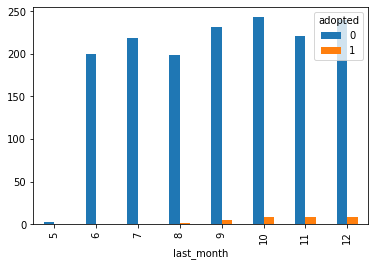

In [63]:
last_session_2012[['last_month','adopted']].value_counts().unstack().plot(kind='bar');

In [64]:
print('2012 Highest adopted vs non adopted end months: \n\n', 
      last_session_2012[['last_month','adopted']].\
      value_counts().unstack().idxmax())
print('\nvalues: \n\n',last_session_2012[['last_month','adopted']].value_counts().unstack().max())

2012 Highest adopted vs non adopted end months: 

 adopted
0    10
1    10
dtype: int64

values: 

 adopted
0    243.0
1      8.0
dtype: float64


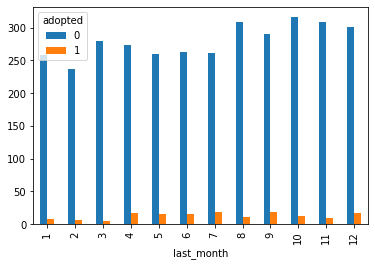

In [65]:
last_session_2013[['last_month','adopted']].value_counts().unstack().plot(kind='bar');

In [66]:
print('2013 Highest adopted vs non adopted end months: \n\n', 
      last_session_2013[['last_month','adopted']].\
      value_counts().unstack().idxmax())
print('\nvalues: \n\n',last_session_2013[['last_month','adopted']].value_counts().unstack().max())

2013 Highest adopted vs non adopted end months: 

 adopted
0    10
1     9
dtype: int64

values: 

 adopted
0    316
1     19
dtype: int64


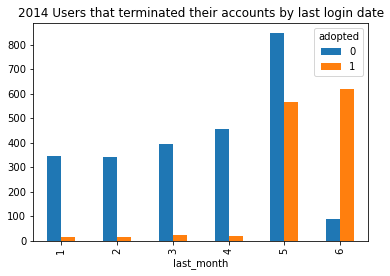

In [67]:
last_session_2014[['last_month','adopted']].value_counts().unstack().plot(kind='bar', title='2014 Users that terminated their accounts by last login date');

In [68]:
print('2014 Highest adopted vs non adopted end months: \n\n', 
      last_session_2014[['last_month','adopted']].\
      value_counts().unstack().idxmax())
print('\nvalues: \n\n',last_session_2014[['last_month','adopted']].value_counts().unstack().max())

2014 Highest adopted vs non adopted end months: 

 adopted
0    5
1    6
dtype: int64

values: 

 adopted
0    847
1    621
dtype: int64


# Highest number of account termination by adopted users in June 2014

In [69]:
# Find features associated with highest proportion of adopted users based on the date found above

start_2013.head()

,user_id,adopted,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_month,last_year,first_month,first_year,active_days,provider
creation_time,,,,,,,,,,,,,,,,
2013-01-01 01:37:45,2844,0,Williamson Lilly,LillyWilliamson@gmail.com,GUEST_INVITE,2013-01-03 01:37:45,0,0,4,8856.0,1,2013,1,2013,2,gmail.com
2013-01-01 02:17:11,10466,0,Hussain Aaron,AaronHussain@hotmail.com,GUEST_INVITE,2013-01-02 02:17:11,0,0,369,6713.0,1,2013,1,2013,1,hotmail.com
2013-01-01 06:58:32,5377,0,Krogh Simon,SimonLKrogh@gmail.com,PERSONAL_PROJECTS,2013-01-02 06:58:32,0,0,2,0.0,1,2013,1,2013,1,gmail.com
2013-01-01 08:13:59,11527,1,Watts Amber,AmberWatts@jourrapide.com,ORG_INVITE,2014-05-04 08:13:59,1,1,339,10778.0,5,2014,1,2013,488,jourrapide.com
2013-01-01 09:46:15,9152,0,Ribeiro Bruna,BrunaBarrosRibeiro@cuvox.de,ORG_INVITE,2013-01-02 09:46:15,0,0,152,7173.0,1,2013,1,2013,1,cuvox.de


In [70]:
start_2013_oct = start_2013.loc['2013-10']

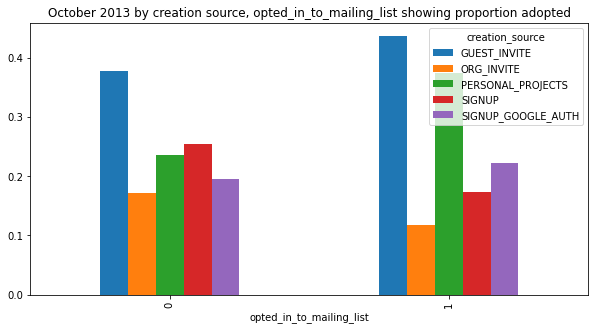

In [71]:
start_2013_oct[['creation_source','opted_in_to_mailing_list','adopted']].\
groupby(['creation_source','opted_in_to_mailing_list'])['adopted'].\
mean().unstack().unstack().unstack().\
plot(figsize=(10,5),kind='bar', 
     title='October 2013 by creation source, opted_in_to_mailing_list showing proportion adopted');

# Highest proportion of adopted users in the entire 3 years (Oct 2013), shows users starting through guest invites and opting into marketing emails

In [72]:
last_2014_june = last_session_2014.loc['2014-06']

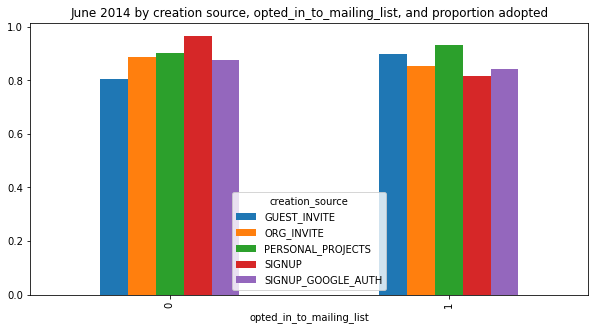

In [73]:
last_2014_june[['creation_source','opted_in_to_mailing_list','adopted']].\
groupby(['creation_source','opted_in_to_mailing_list'])['adopted'].\
mean().unstack().unstack().unstack().\
plot(figsize=(10,5),kind='bar', 
     title='June 2014 by creation source, opted_in_to_mailing_list, and proportion adopted');

# The highest proportion of adopted users who terminated their account during the date with the highest number of terminations - stopped using account - (june 2014) signed up via the website and did not opt in for marketing emails

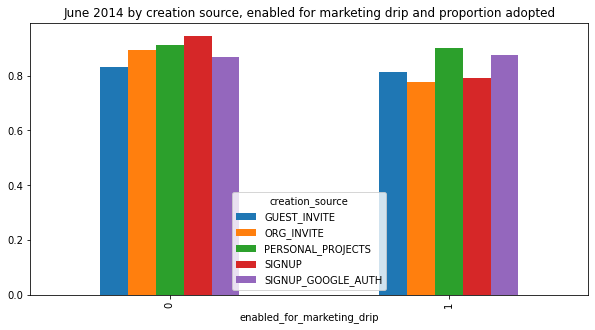

In [74]:
last_2014_june[['creation_source','enabled_for_marketing_drip','adopted']].\
groupby(['creation_source','enabled_for_marketing_drip'])['adopted'].\
mean().unstack().unstack().unstack().\
plot(figsize=(10,5),kind='bar', 
     title='June 2014 by creation source, enabled for marketing drip and proportion adopted');

# Adopted users that signed up via the website and terminated their accounts had the highest proportion of not enabled for marketing drip

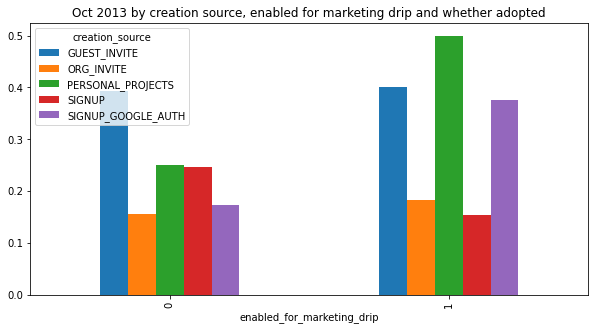

In [75]:
start_2013_oct[['creation_source','enabled_for_marketing_drip','adopted']].\
groupby(['creation_source','enabled_for_marketing_drip'])['adopted'].\
mean().unstack().unstack().unstack().\
plot(figsize=(10,5),kind='bar', 
     title='Oct 2013 by creation source, enabled for marketing drip and whether adopted');

# Adopted users who were enabled for marketing drip also signed up through personal projects (were invited  to  join  another  user's personal  workspace)


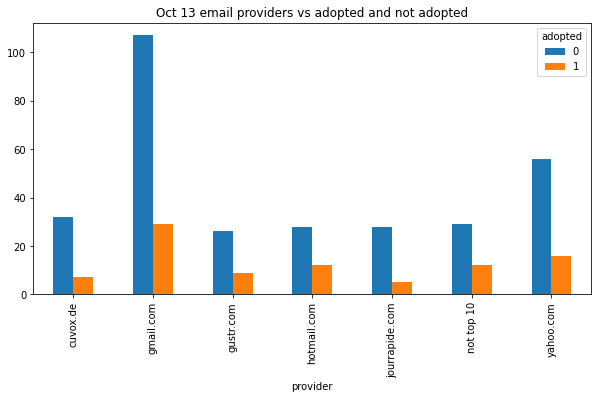

In [95]:
# Let's take a look at email providers we derived from emails

start_2013_oct[['provider','adopted']].value_counts().unstack().plot(figsize=(10,5), 
kind='bar', title = 'Oct 13 email providers vs adopted and not adopted');

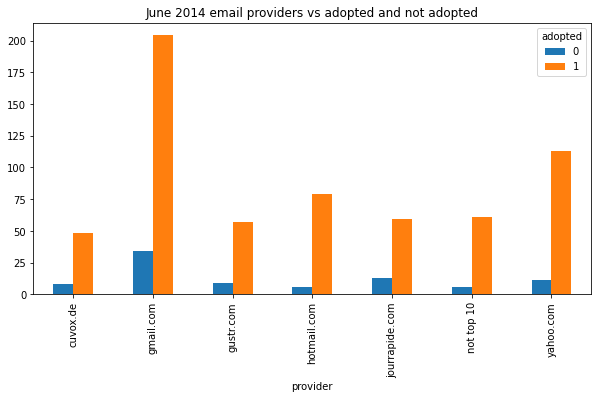

In [96]:
last_2014_june[['provider','adopted']].value_counts().unstack().plot(figsize=(10,5), 
kind='bar', title = 'June 2014 email providers vs adopted and not adopted');

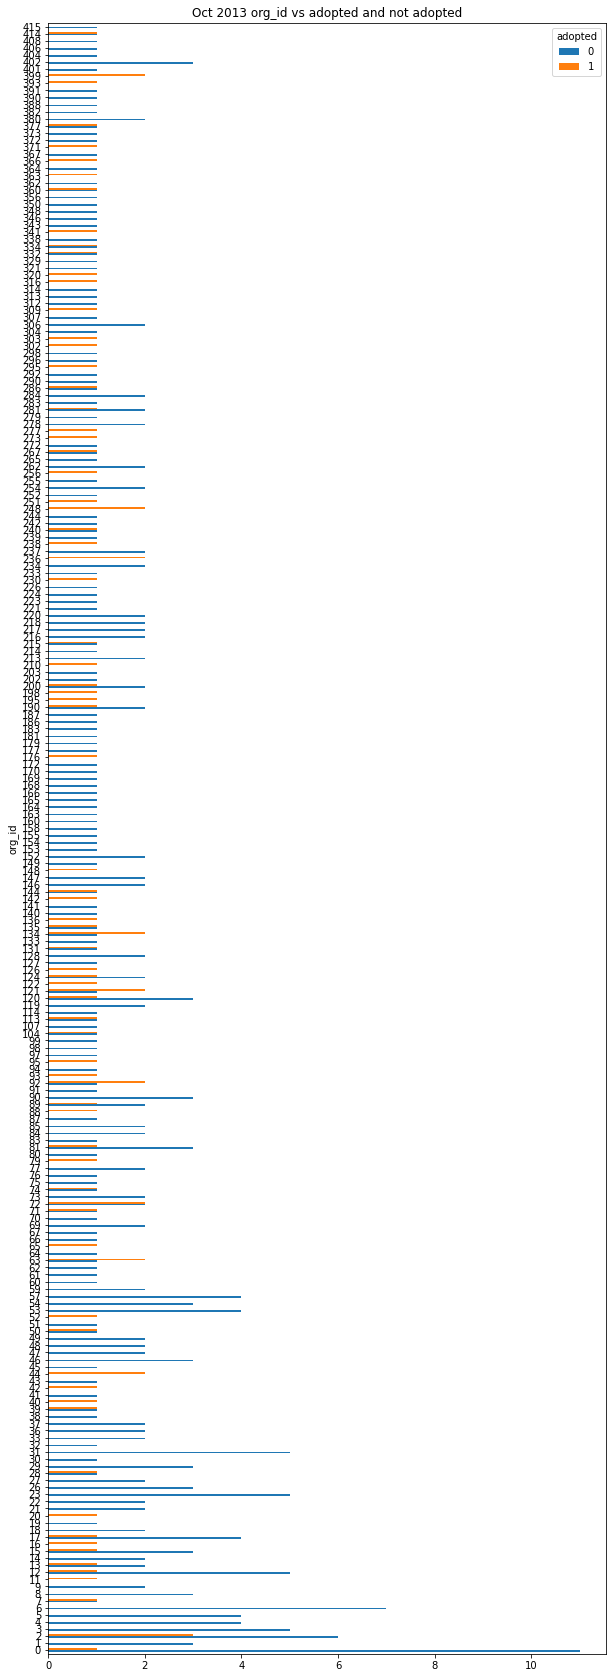

In [97]:
# Check out org_id

start_2013_oct[['org_id','adopted']].value_counts().\
unstack().plot(figsize=(10,30), kind='barh', title = 'Oct 2013 org_id vs adopted and not adopted');

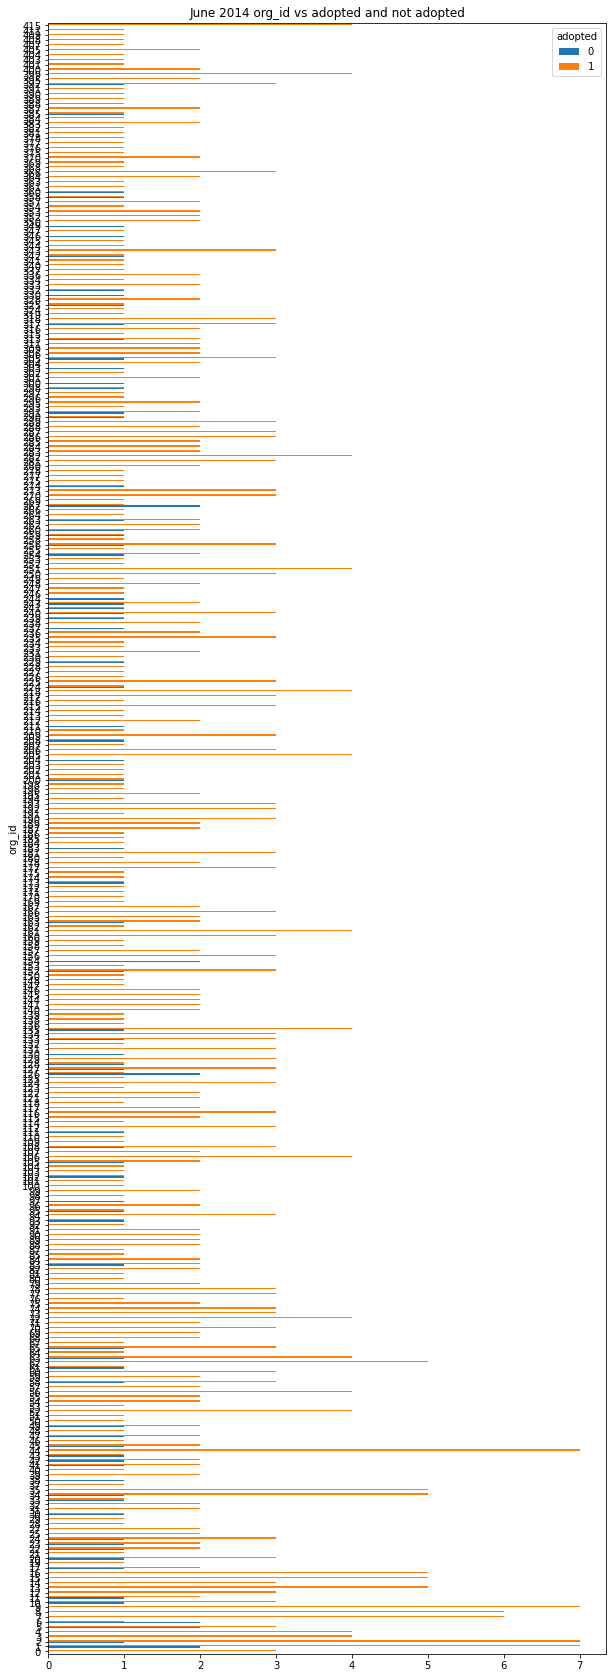

In [98]:


last_2014_june[['org_id','adopted']].value_counts().unstack().\
plot(figsize=(10,30), kind='barh', title='June 2014 org_id vs adopted and not adopted');

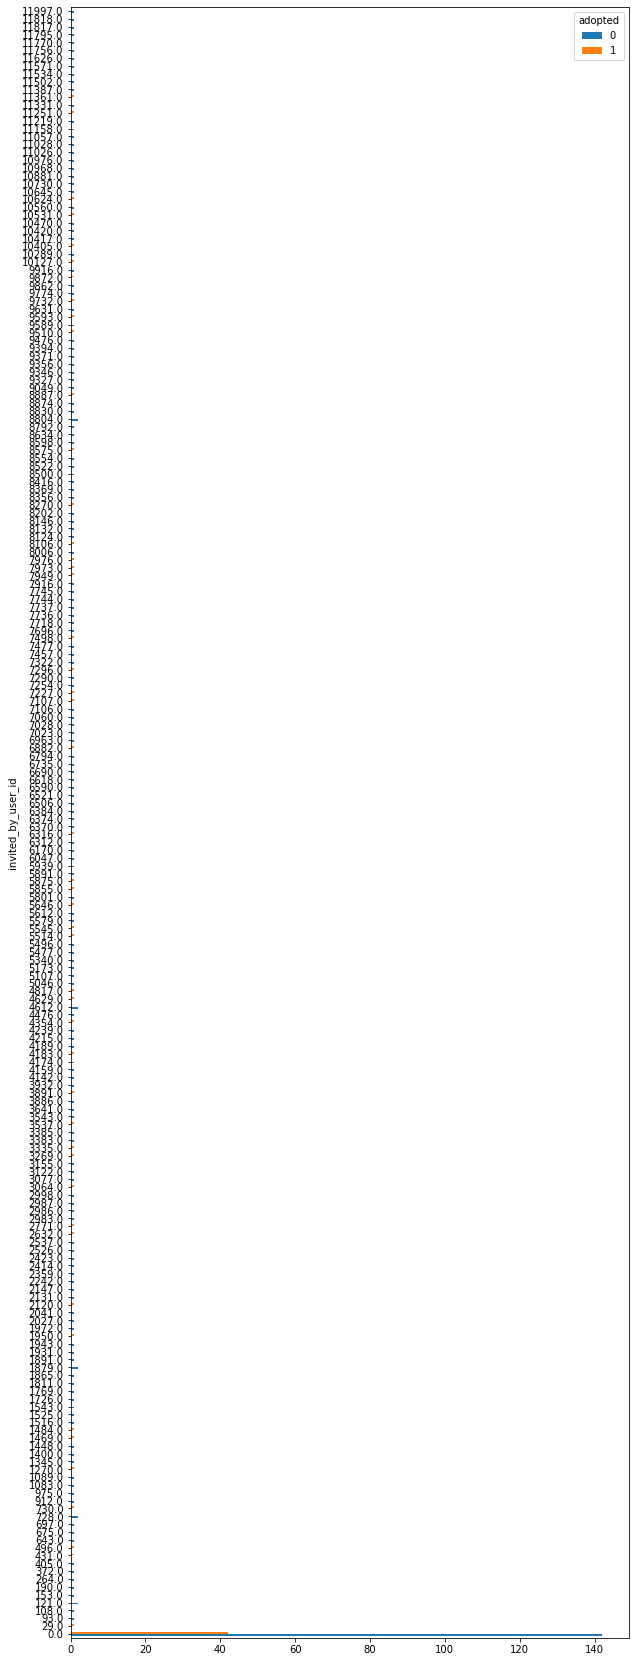

In [84]:
# invited by user

start_2013_oct[['invited_by_user_id','adopted']].value_counts().unstack().plot(figsize=(10,30), kind='barh');

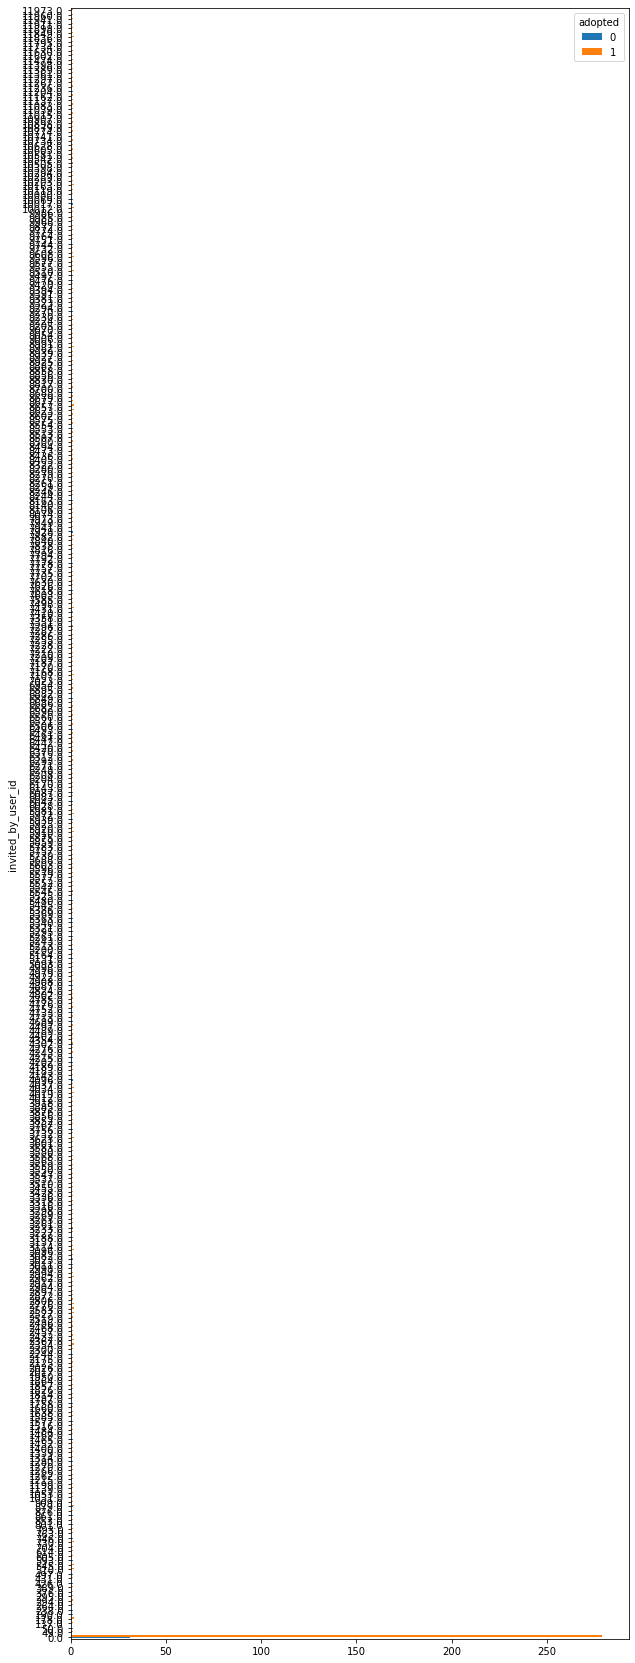

In [85]:
last_2014_june[['invited_by_user_id','adopted']].value_counts().unstack().plot(figsize=(10,30), kind='barh');

In [86]:
data.columns

Index(['user_id', 'adopted', 'creation_time', 'name', 'email',
       'creation_source', 'last_session_creation_time',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'last_month', 'last_year', 'first_month',
       'first_year', 'active_days', 'provider'],
      dtype='object')

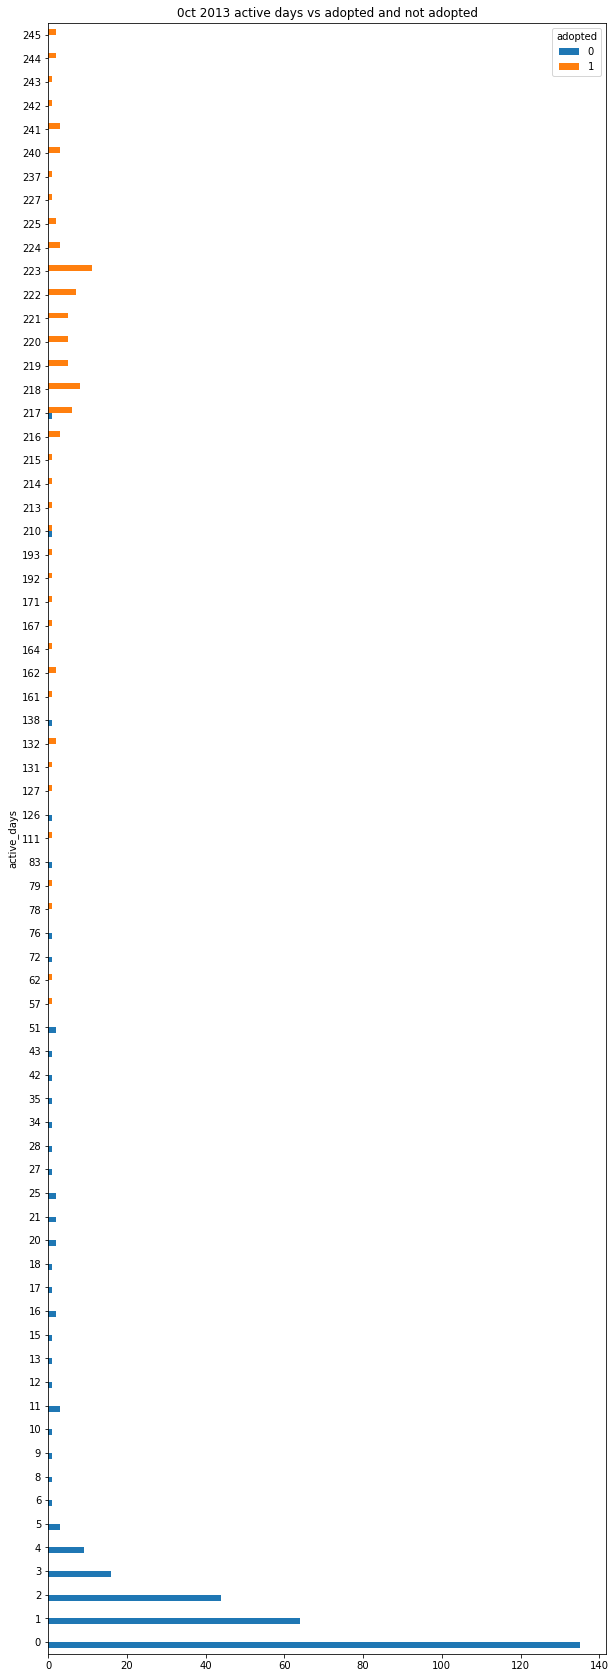

In [99]:
# and last but not least active days

start_2013_oct[['active_days','adopted']].value_counts().unstack().plot(figsize=(10,30), 
kind='barh', title = '0ct 2013 active days vs adopted and not adopted');

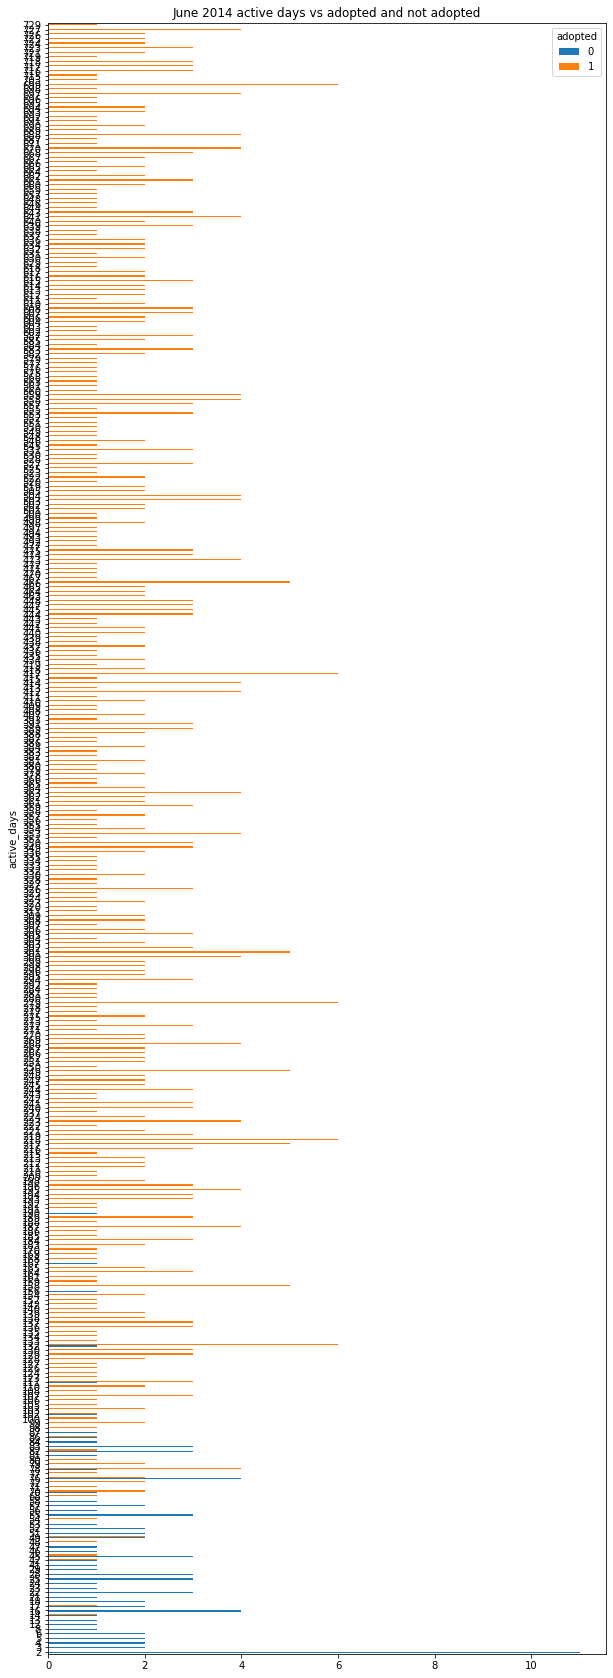

In [100]:
# Let's take a look at active days by termination period

last_2014_june[['active_days','adopted']].value_counts().unstack().plot(figsize=(10,30), 
kind='barh', title = 'June 2014 active days vs adopted and not adopted');

# The features provider (created from email), org_id and active_days (created from time features) provide very good separation between adopted vs not adopted. Active days clearly shows that adopted users have a higher proportion longer days active

#### Because of clear difference in distribution groupings in terms of the dependent variable these variables are expected to be strong factors for prediction (they should help considerably in explaining the variance of our dependent variable), we have : 

* Time Features we created from the time series including time active
* org_id
* provider(email)
* GUEST_INVITE 
* opted_in_to_mailing_list
* enabled_for_marketing_drip
* SIGN_UP
* PERSONAL_PROJECTS


In [91]:
data.columns

Index(['user_id', 'adopted', 'creation_time', 'name', 'email',
       'creation_source', 'last_session_creation_time',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'last_month', 'last_year', 'first_month',
       'first_year', 'active_days', 'provider'],
      dtype='object')

In [92]:
dataset = data.to_csv(r'C:\Users\Jorge\OneDrive\My Documents\SpringBoard\1481069814_relax_challenge\relax_challenge\dataset.csv', header=True)